# Gaussian Laser Beam
This is a notebook to fit a Gaussian function to the data obtaine from measuring the beam profile of HeNe laser.

In [0]:
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt
import numpy as np
#from numpy import *
%matplotlib inline
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7.5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)
plt.style.use('ggplot')

## Load a file from your computer
When you collect data, save it in a .csv file that has columns of position (micrometers) and beam intensity (voltage). The columns should be separated by a comma. For example,

|position, |intensity|
|----------|---------|
|0,  | 0.00 |
|10, | 0.25 |
|20, | 0.50 |

The following code will prompt you to find a file to upload.

In [0]:
from google.colab import files
uploaded = files.upload()

Saving fake-data.csv to fake-data.csv


Once the file is uploaded, you can open it for reading the contents into a pandas dataframe. You will need to rename the file below to match the filename you uploaded.

In [0]:
import io
gauss_data = pd.read_csv(io.BytesIO(uploaded['fake-data.csv']))
print (gauss_data)

    position  intensity  intensity_noise
0          0   0.000002         0.500002
1         10   0.000018         0.500018
2         20   0.000163         0.500163
3         30   0.001204         0.101204
4         40   0.007282         0.707282
5         50   0.036066         0.636066
6         60   0.146253         0.946253
7         70   0.485578         0.585578
8         80   1.319938         1.819938
9         90   2.937577         3.037577
10       100   5.352614         5.652614
11       110   7.985162         8.785162
12       120   9.753099        10.553099
13       130   9.753099        10.353099
14       140   7.985162         8.485162
15       150   5.352614         6.052614
16       160   2.937577         3.937577
17       170   1.319938         1.519938
18       180   0.485578         0.685578
19       190   0.146253         0.846253
20       200   0.036066         1.036066
21       210   0.007282         0.607282
22       220   0.001204         0.901204
23       230   0

Cool, we have data in a pandas dataframe called "gauss_data". It has columns of position (in micrometers), intensity (volts), and intensity_noise (volts). I've created fake data with and without random noise.

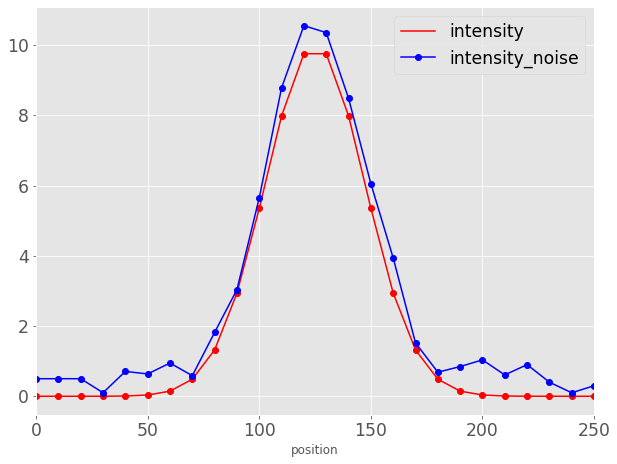

In [0]:
ax = plt.gca()
gauss_data.plot(style='-ro', x='position', y='intensity', color='red', ax=ax)
gauss_data.plot(style='-bo', x='position', y='intensity_noise', color='blue', ax=ax)
plt.show()

## Curve Fitting
Now, we want to add a Gaussian curve fit to the data. We'll need to define the function and use Scipy's `optimize` to do the fitting. Let's start with the example of no noise. The amplitude I used was 10. The center is 125, and the width is 1000. 

In [0]:
from scipy import exp
#initial guesses at the paramters
x0 = [5, 125, 100] # amplitude, center, width
#weights for the data points are all equal to 1
gauss_data['sigma']=1

def gaussfit(x, a, b, w):
    return a*exp(-((x-b)**2)/w)
result = optimization.curve_fit(gaussfit, gauss_data['position'], gauss_data['intensity'], x0, gauss_data['sigma'])
print(result)

(array([  10.,  125., 1000.]), array([[ 2.79456255e-20,  3.38037525e-27, -3.72608340e-18],
       [ 3.38037525e-27,  1.86304170e-19, -6.34009706e-25],
       [-3.72608340e-18, -6.34009706e-25,  1.49043338e-15]]))


Now, let's try the noisy data. The parameters are the same as before, but the noise might confuse the fitting routine.

In [0]:
result_noise = optimization.curve_fit(gaussfit, gauss_data['position'], gauss_data['intensity_noise'], x0, gauss_data['sigma'])
print(result_noise)

(array([  10.58074838,  125.44076128, 1111.88734439]), array([[ 8.43937274e-02,  9.57286673e-09, -1.18251410e+01],
       [ 9.57286673e-09,  5.58807942e-01, -1.88644931e-06],
       [-1.18251410e+01, -1.88644931e-06,  4.97077099e+03]]))


## Plot the results
Let's graph the data as scatter plots and put the curve fits as lines over them.

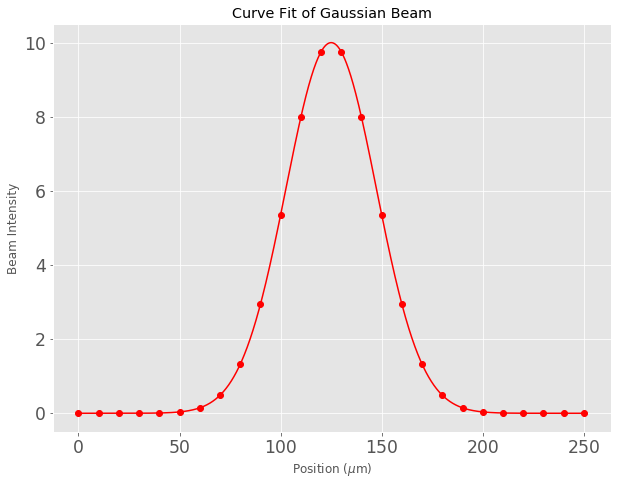

In [0]:
fitx = np.arange(0,251, 0.1)
fit=result[0][0]*exp(-((fitx-result[0][1])**2)/result[0][2])
plt.title('Curve Fit of Gaussian Beam')
plt.xlabel('Position ($\mu$m)')
plt.ylabel('Beam Intensity')
plt.plot(gauss_data['position'], gauss_data['intensity'], 'ro')
plt.plot(fitx, fit, '-r')
plt.show()

Now, let's graph the noisy fit

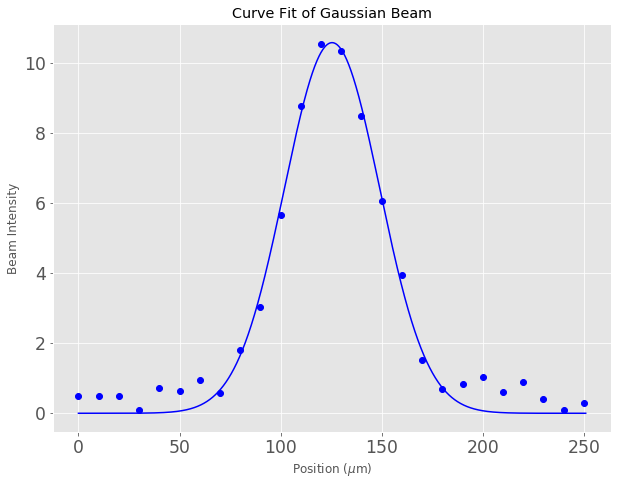

In [0]:
fitx = np.arange(0,251, 0.1)
fit_noise=result_noise[0][0]*exp(-((fitx-result_noise[0][1])**2)/result_noise[0][2])
plt.title('Curve Fit of Gaussian Beam')
plt.xlabel('Position ($\mu$m)')
plt.ylabel('Beam Intensity')
plt.plot(gauss_data['position'], gauss_data['intensity_noise'], 'bo')
plt.plot(fitx, fit_noise, '-b')
plt.show()

## Uncertainty in the results
Take a look at the output above for `result` and `result_noise`. The first part of the array `[0][*]` is the fit parameters. The second part of the array `[1][*]` is the covariant matrix that identifies uncertainty in the fit parameters. If the fit parameters are not correlated with one another, the covariant matrix will be diagonal. This means the fit parameters are independent of one another, and the diagonals are the squares of the uncertainties. For the no noise example, the covariant matrix is

\begin{equation}
\sigma^2 = \begin{pmatrix}
2.79\times10^{-20} & 3.38\times10^{-27} & -3.73\times10^{-18}
\\
3.38\times10^{-27} & 186\times10^{-19} & -6.34\times10^{-25}
\\
-3.73\times10^{-18} & -6.34\times10^{-25} & 1.49\times10^{-15}
\end{pmatrix}
\end{equation}

For the noisy data, the covariant matrix is

\begin{equation}
\sigma^2 = \begin{pmatrix}
8.44\times10^{-2} & 9.57\times10^{-9} & -1.18\times10^{1}
\\
9.57\times10^{-9} & 5.59\times10^{-1} & -1.89\times10^{-6}
\\
-1.18\times10^{1} & -1.89\times10^{-6} & 4.97\times10^{3}
\end{pmatrix}
\end{equation}

Clearly, the noise causes an increase in uncertainty. The fit parameters are amplitude, center, and width. The Gaussian function is

$$y(x) = A {\rm e}^{-\left(x-x_{\circ}\right)/2w^2},$$

where $A$ is the amplitude, $x$ is the measured position, $x_{\circ}$ is the center position, and $w$ is the width. The amplitude will depend on the intensity of the laser beam and is unique to each experiment. The fit function used above defines the width parameter as

$${\rm fit~parameter} = 2w^2$$ 

Let's take a closer look at the result of the width since this is the parameter specified by the laser manufacturer. Without noise we have

\begin{equation}
\begin{split}
2w^2 &= 1000 \pm 3.86\times10^{-8}~{\rm \mu m}
\\
w &= 32 \pm 0.00014~{\rm \mu m}
\end{split}
\end{equation}

With the random noise, the result is

\begin{equation}
\begin{split}
2w^2 &= 1112 \pm 70.5~{\rm \mu m}
\\
w &= 24 \pm 6~{\rm \mu m}
\end{split}
\end{equation}

The uncertainty in the noisy data width does not overlap with the expected value within one standard deviation, but it does overlap within two.